# Елисеев В. Б. РТ5-61Б
# РК 2, Вариант 4
Задание. Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("toy_dataset.csv")
data.shape

(150000, 6)

In [3]:
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [4]:
data.isnull().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

Пропусков нет, перейдем к масштабированию данных

# Масштабирование

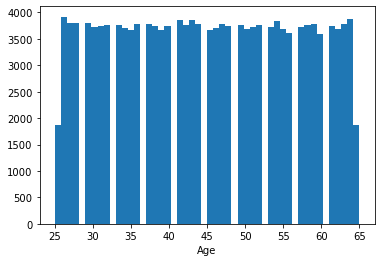

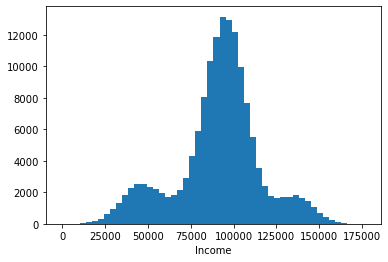

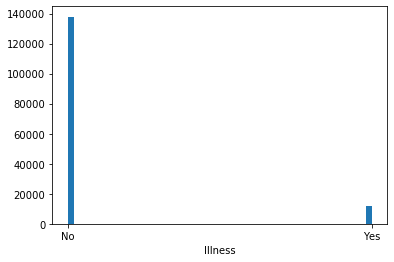

In [5]:
from sklearn.preprocessing import MinMaxScaler
num_col = ['Age', 'Income', 'Illness']
for col in data[num_col]:
    plt.hist(data[col],50)
    plt.xlabel(col)
    plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.loc[:, 'Illness'] = le.fit_transform(data['Illness'])
data['Illness'].head()

0    0
1    0
2    0
3    0
4    0
Name: Illness, dtype: int64

In [7]:
# minmax
sc1 = MinMaxScaler()
for item in num_col:
    data.loc[:, item] = sc1.fit_transform(data[[item]])

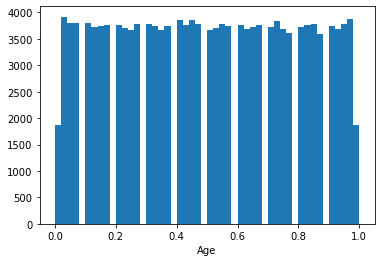

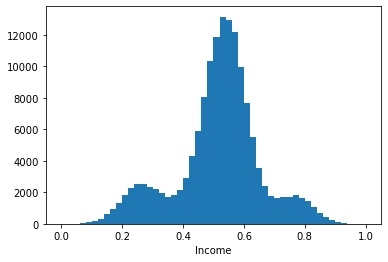

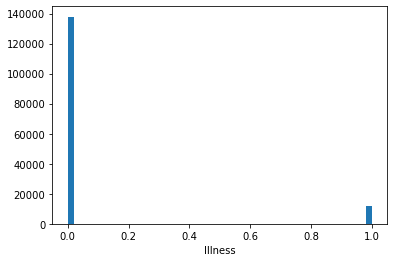

In [8]:
# гистограмма
for col in data[num_col]:
    plt.hist(data[col],50)
    plt.xlabel(col)
    plt.show()

# Кодирование категориальных признаков

In [9]:
cat_cols = ['City', 'Gender', 'Age']
one_hot = pd.get_dummies(data[cat_cols].astype(str))
one_hot.head()

,City_Austin,City_Boston,City_Dallas,City_Los Angeles,City_Mountain View,City_New York City,City_San Diego,City_Washington D.C.,Gender_Female,Gender_Male,...,Age_0.7750000000000001,Age_0.8,Age_0.8250000000000002,Age_0.8500000000000001,Age_0.875,Age_0.9000000000000001,Age_0.925,Age_0.9500000000000002,Age_0.9750000000000001,Age_1.0
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Бинарные значения
data = data.join(one_hot)
data.drop(columns=cat_cols, inplace=True)

In [11]:
data.head()

,Number,Income,Illness,City_Austin,City_Boston,City_Dallas,City_Los Angeles,City_Mountain View,City_New York City,City_San Diego,...,Age_0.7750000000000001,Age_0.8,Age_0.8250000000000002,Age_0.8500000000000001,Age_0.875,Age_0.9000000000000001,Age_0.925,Age_0.9500000000000002,Age_0.9750000000000001,Age_1.0
0,1,0.230700,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0.257228,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0.298840,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0.233928,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0.286501,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Построение моделей

In [12]:
from sklearn.model_selection import train_test_split
data_train, data_test, data_y_train, data_y_test = train_test_split(data[data.columns.drop('Number')], data['Number'], random_state=1)

In [ ]:
# Дерево решений
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor(random_state=1).fit(data_train, data_y_train)
data_test_predicted_dtc = dtc.predict(data_test)

In [ ]:
# Градиентный спуск
from sklearn.ensemble import GradientBoostingRegressor

gboostreg = GradientBoostingRegressor(random_state=10).fit(data_train, data_y_train)
gboostreg_predict = gboostreg.predict(data_test)

# Оценка качества

Сравним значения средней квадратичной ошибки и коэффициент детерминации:

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
# средняя квадратичная ошибка
print('Метрика MSE:\nДерево решений: {}\nГрадиентный бустинг: {}'.format(mean_squared_error(data_y_test, data_test_predicted_dtc), mean_squared_error(data_y_test, gboostreg_predict)))

Метрика MSE:
Дерево решений: 196526557.47205406
Градиентный бустинг: 97264177.54681845


In [16]:
# Коэффициент детерминации
print('Коэффициент детерминации:\nДерево решений: {}\nГрадиентный бустинг: {}'.format(r2_score(data_y_test, data_test_predicted_dtc), r2_score(data_y_test, gboostreg_predict)))

Коэффициент детерминации:
Дерево решений: 0.8955637143042237
Градиентный бустинг: 0.9483127900630495


Оценка качества показывает, что "Градиентный спуск" справляется с задачей лучше, 